# Nettoyage

In [2]:
import pandas as pd
from IPython.display import display

chemin_fichier = '/Users/ambreservaege/Downloads/worldometer/wordlpopulation/population_pays_années.csv'

df = pd.read_csv(chemin_fichier)

df.head()

,country_name,year,population
0,France,2024,"66,548,530"
1,France,2023,"66,438,822"
2,France,2022,"66,277,409"
3,France,2020,"65,905,277"
4,France,2015,"64,916,336"


In [3]:
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

df = df.dropna()

df = df.drop_duplicates()


df['population'] = df['population'].str.replace(',', '').astype(int)


print("\nPremières lignes du DataFrame nettoyé :")
print(df.head())


Valeurs manquantes par colonne :
country_name    0
year            0
population      0
dtype: int64

Premières lignes du DataFrame nettoyé :
  country_name  year  population
0       France  2024    66548530
1       France  2023    66438822
2       France  2022    66277409
3       France  2020    65905277
4       France  2015    64916336


In [4]:
display(df)

,country_name,year,population
0,France,2024,66548530
1,France,2023,66438822
2,France,2022,66277409
3,France,2020,65905277
4,France,2015,64916336
...,...,...,...
4140,India,1975,611309535
4141,India,1970,545864268
4142,India,1965,490140146
4143,India,1960,435990338


# Visualisation

Year: 2023, Predicted Population: 32281423.14004159
Year: 2024, Predicted Population: 32596676.732329488
Year: 2025, Predicted Population: 32911930.324617505
Year: 2026, Predicted Population: 33227183.916905522
Year: 2027, Predicted Population: 33542437.50919342
Year: 2028, Predicted Population: 33857691.10148144
Year: 2029, Predicted Population: 34172944.693769336
Year: 2030, Predicted Population: 34488198.28605735
Year: 2031, Predicted Population: 34803451.87834537
Year: 2032, Predicted Population: 35118705.47063327


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


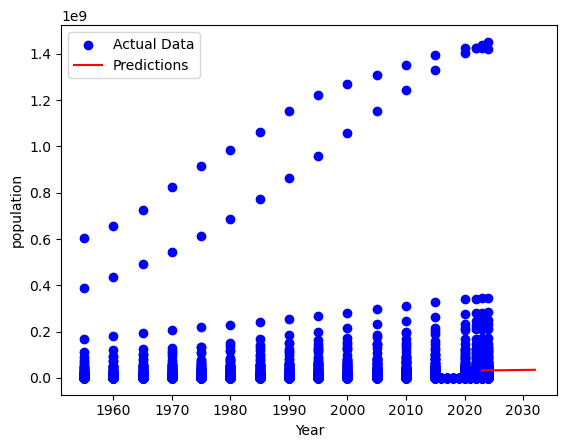

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

X = df[['year']]
y = df['population']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les populations futures pour les 5 à 10 prochaines années
future_years = np.array([[year] for year in range(2023, 2033)]) 
future_predictions = model.predict(future_years)

# Afficher les prédictions
for year, prediction in zip(future_years, future_predictions):
    print(f"Year: {year[0]}, Predicted Population: {prediction}")

# Optionnel : Visualiser les résultats
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(future_years, future_predictions, color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('population')
plt.legend()
plt.show()

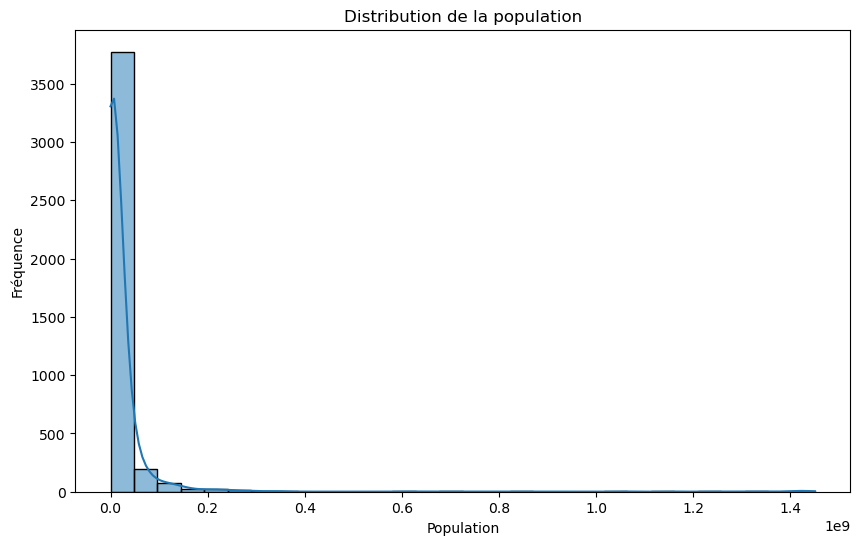

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme de la population
plt.figure(figsize=(10, 6))
sns.histplot(df['population'], bins=30, kde=True)
plt.title('Distribution de la population')
plt.xlabel('Population')
plt.ylabel('Fréquence')
plt.show()

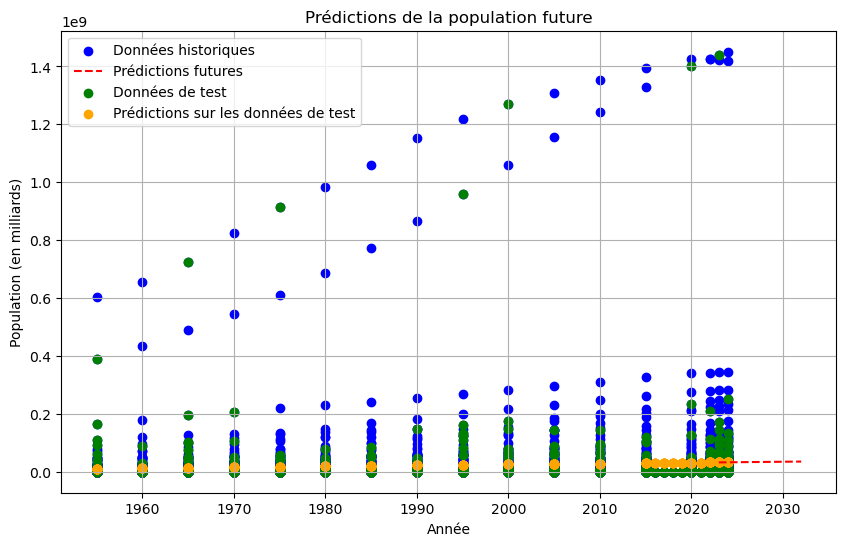

Mean Squared Error: 1.0421876805352402e+16


In [14]:
# Visualiser les résultats
plt.figure(figsize=(10, 6))

# Données historiques
plt.scatter(X, y, color='blue', label='Données historiques')

# Prédictions futures
plt.plot(future_years, future_predictions, color='red', linestyle='--', label='Prédictions futures')

# Prédictions sur les données de test
y_test_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='green', label='Données de test')
plt.scatter(X_test, y_test_pred, color='orange', label='Prédictions sur les données de test')

# Ajouter des labels et une légende
plt.xlabel('Année')
plt.ylabel('Population (en milliards)')
plt.title('Prédictions de la population future')
plt.legend()
plt.grid(True)
plt.show()

# Comparer les prédictions avec les tendances passées
# Calculer l'erreur quadratique moyenne (MSE) pour évaluer la précision
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")